# Problem Context
Pada project ini saya ingin menganalisa dan mengoptimasi sistem stasiun pesepedaan yang ada di San Francsisco Smart City. Selain itu, pada project kali ini saya ingin mencari stasiun awal yang paling favorit di antara stasiun-stasiun lainnya dengan melakukan perhitngan `PageRank` menggunakan teknik perhitungan `Eigen Decomposition.` 

Dataset yang saya gunakan ini diambil dari `Google Cloud Platform.`

# Query yang telah dibuat di Google Cloud Platform
```
SELECT tabelku1.trip_id, tabelku1.start_date, tabelku1.start_station_name, tabelku1.end_station_name, tabelku1.start_station_latitude, tabelku1.start_station_longitude, tabelku1.end_station_latitude, tabelku1.end_station_longitude, tabelku2.region_id 
FROM `bigquery-public-data.san_francisco_bikeshare.bikeshare_trips` AS tabelku1
JOIN `bigquery-public-data.san_francisco_bikeshare.bikeshare_station_info` AS tabelku2
ON tabelku1.start_station_id = tabelku2.station_id
WHERE tabelku1.start_station_name != tabelku1.end_station_name
AND tabelku1.start_station_latitude IS NOT NULL
AND tabelku1.start_station_longitude IS NOT NULL
AND tabelku1.end_station_latitude IS NOT NULL
AND tabelku1.end_station_longitude IS NOT NULL
AND tabelku1.start_date BETWEEN '2017-07-22' AND '2017-12-22';
```

# Import Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('San_Francisco_Station.csv')
df.head()

trip_id               start_date start_station_name  \
0  12432017102516270000  2017-10-25 16:27:00 UTC          Snow Park   
1  19002017101216013200  2017-10-12 16:01:32 UTC          Snow Park   
2  12142017120818404800  2017-12-08 18:40:48 UTC          Snow Park   
3   9632017102416214300  2017-10-24 16:21:43 UTC          Snow Park   
4  21822017092815492200  2017-09-28 15:49:22 UTC          Snow Park   

  end_station_name  start_station_latitude  start_station_longitude  \
0    Mosswood Park               37.807813              -122.264496   
1    Mosswood Park               37.807813              -122.264496   
2    Mosswood Park               37.807813              -122.264496   
3    Mosswood Park               37.807813              -122.264496   
4    Mosswood Park               37.807813              -122.264496   

   end_station_latitude  end_station_longitude  region_id  
0             37.824931            -122.260479         12  
1             37.824931            -122.260479         12  
2             37.824931            -122.260479         12  
3             37.824931            -122.260479         12  
4             37.824931            -122.260479         12

`df.head` ini digunakan untuk melihat 5 baris paling atas pada dataset by default.

In [3]:
df.tail()

trip_id               start_date  \
430739   5032017111014205100  2017-11-10 14:20:51 UTC   
430740  21312017101623150500  2017-10-16 23:15:05 UTC   
430741  13962017091117015500  2017-09-11 17:01:55 UTC   
430742  31012017112510285700  2017-11-25 10:28:57 UTC   
430743  16052017092717360900  2017-09-27 17:36:09 UTC   

                                       start_station_name  \
430739  Yerba Buena Center for the Arts (Howard St at ...   
430740  Yerba Buena Center for the Arts (Howard St at ...   
430741  Yerba Buena Center for the Arts (Howard St at ...   
430742  Yerba Buena Center for the Arts (Howard St at ...   
430743  Yerba Buena Center for the Arts (Howard St at ...   

                                         end_station_name  \
430739  Civic Center/UN Plaza BART Station (Market St ...   
430740  Civic Center/UN Plaza BART Station (Market St ...   
430741  Civic Center/UN Plaza BART Station (Market St ...   
430742  Civic Center/UN Plaza BART Station (Market St ...   
430743  Civic Center/UN Plaza BART Station (Market St ...   

        start_station_latitude  start_station_longitude  end_station_latitude  \
430739               37.784872              -122.400876             37.781074   
430740               37.784872              -122.400876             37.781074   
430741               37.784872              -122.400876             37.781074   
430742               37.784872              -122.400876             37.781074   
430743               37.784872              -122.400876             37.781074   

        end_station_longitude  region_id  
430739            -122.411738          3  
430740            -122.411738          3  
430741            -122.411738          3  
430742            -122.411738          3  
430743            -122.411738          3

`df.tail()` ini digunakan untuk melihat 5 baris paling bawah pada dataset by default.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430744 entries, 0 to 430743
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   trip_id                  430744 non-null  object 
 1   start_date               430744 non-null  object 
 2   start_station_name       430744 non-null  object 
 3   end_station_name         430744 non-null  object 
 4   start_station_latitude   430744 non-null  float64
 5   start_station_longitude  430744 non-null  float64
 6   end_station_latitude     430744 non-null  float64
 7   end_station_longitude    430744 non-null  float64
 8   region_id                430744 non-null  int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 29.6+ MB


In [5]:
df.describe()

start_station_latitude  start_station_longitude  end_station_latitude  \
count           430744.000000            430744.000000         430744.000000   
mean                37.771043              -122.362754             37.771009   
std                  0.088260                 0.107814              0.088103   
min                 37.317298              -122.444293             37.317298   
25%                 37.772406              -122.413004             37.773507   
50%                 37.783899              -122.399051             37.782411   
75%                 37.795392              -122.390648             37.795392   
max                 37.880222              -121.874119             37.880222   

       end_station_longitude      region_id  
count          430744.000000  430744.000000  
mean             -122.361681       4.762476  
std                 0.107148       3.599911  
min              -122.444293       3.000000  
25%              -122.411306       3.000000  
50%              -122.398525       3.000000  
75%              -122.390648       3.000000  
max              -121.874119      14.000000

`df.describe` ini digunakan untuk melihat deskripsi dari datasetnya.

In [6]:
df.shape

(430744, 9)

`df.shape` ini digunakan untuk melihat ukuran baris dan kolomnya.

###  `start_stations` dan `end_stations` 

Pada tahap ini saya ingin membuat variable baru yang berisi masing-masing stasiun awal keberangkatan dan tujuan stasiun akhirnya.

In [7]:
df.head()

trip_id               start_date start_station_name  \
0  12432017102516270000  2017-10-25 16:27:00 UTC          Snow Park   
1  19002017101216013200  2017-10-12 16:01:32 UTC          Snow Park   
2  12142017120818404800  2017-12-08 18:40:48 UTC          Snow Park   
3   9632017102416214300  2017-10-24 16:21:43 UTC          Snow Park   
4  21822017092815492200  2017-09-28 15:49:22 UTC          Snow Park   

  end_station_name  start_station_latitude  start_station_longitude  \
0    Mosswood Park               37.807813              -122.264496   
1    Mosswood Park               37.807813              -122.264496   
2    Mosswood Park               37.807813              -122.264496   
3    Mosswood Park               37.807813              -122.264496   
4    Mosswood Park               37.807813              -122.264496   

   end_station_latitude  end_station_longitude  region_id  
0             37.824931            -122.260479         12  
1             37.824931            -122.260479         12  
2             37.824931            -122.260479         12  
3             37.824931            -122.260479         12  
4             37.824931            -122.260479         12

In [8]:
start_stations = list(df.start_station_name.drop_duplicates())

start_stations

['Snow Park',
 'SAP Center',
 'Cahill Park',
 'Duboce Park',
 'Esprit Park',
 'Ryland Park',
 'Bushrod Park',
 'Precita Park',
 '5th at Folsom',
 'Koshland Park',
 'Mosswood Park',
 'DeFremery Park',
 'Bestor Art Park',
 'Franklin Square',
 'Saint James Park',
 'San Antonio Park',
 'San Pedro Square',
 '18th St at Noe St',
 '45th St at Manila',
 '12th St at 4th Ave',
 '12th St at 6th Ave',
 '37th St at West St',
 'Ashby BART Station',
 'Berry St at 4th St',
 'Broadway at Kearny',
 'Jackson Playground',
 'Mission Playground',
 'San Jose City Hall',
 'West St at 40th St',
 '1st St at Folsom St',
 '2nd St at Folsom St',
 '5th St at Taylor St',
 'Bay Pl at Vernon St',
 'Broadway at 30th St',
 'Broadway at 40th St',
 'Bryant St at 6th St',
 'Dover St at 57th St',
 'Doyle St at 59th St',
 'Folsom St at 3rd St',
 'Folsom St at 9th St',
 'Frank H Ogawa Plaza',
 'Genoa St at 55th St',
 'George St at 1st St',
 'Howard St at 2nd St',
 'Howard St at 8th St',
 'Julian St at 6th St',
 'Market St at 

`start_stations = list(df.start_station_name.drop_duplicates())` <br>
Kode di atas ini digunakan untuk mengambil list yang ada di dalam kolom `start_station_name` dan menyimpannya di dalam variable baru yang bernama `start_stations,`

`drop_duplicates()` ini diguakan untuk mengeliminasi data yang terduplikat.

In [9]:
end_stations = list(df.end_station_name.drop_duplicates())

end_stations

['Mosswood Park',
 'DeFremery Park',
 'San Antonio Park',
 '45th St at Manila',
 '12th St at 4th Ave',
 '12th St at 6th Ave',
 'Bay Pl at Vernon St',
 'Broadway at 30th St',
 'Broadway at 40th St',
 'Frank H Ogawa Plaza',
 'Genoa St at 55th St',
 '10th St at Fallon St',
 '24th St at Market St',
 '2nd Ave at E 18th St',
 'Emeryville Town Hall',
 'Horton St at 40th St',
 '10th Ave at E 15th St',
 'Adeline St at 40th St',
 'Berkeley Civic Center',
 'Franklin St at 9th St',
 'Jackson St at 14th St',
 'MLK Jr Way at 14th St',
 'Webster St at 17th St',
 '13th St at Franklin St',
 'Franklin St at 14th St',
 'Lakeside Dr at 14th St',
 'MacArthur BART Station',
 'College Ave at Taft Ave',
 'Grand Ave at Perkins St',
 'Grand Ave at Webster St',
 'Oregon St at Adeline St',
 'Washington St at 8th St',
 '19th Street BART Station',
 '34th St at Telegraph Ave',
 '49th St at Telegraph Ave',
 '55th St at Telegraph Ave',
 'Telegraph Ave at 19th St',
 'Telegraph Ave at 23rd St',
 'Telegraph Ave at 27th S

`end_stations = list(df.end_station_name.drop_duplicates())` <br>
Kode di atas ini digunakan untuk mengambil list yang ada di dalam kolom `end_station_name` dan menyimpannya di dalam variable baru yang bernama `end_stations,`

`drop_duplicates()` ini diguakan untuk mengeliminasi data yang terduplikat.

### 2. Station Detection
Pada tahap ini saya ingin mendeteksi stasiun yang hanya berada di salah satu variable (start_stations/end_stations).

In [10]:
exclusive_stations = np.setxor1d(np.array(start_stations), np.array(end_stations))
exclusive_stations

array(['2nd St at S Park St', '5th St at Brannan St',
       '5th St at Howard St', '7th St at Brannan St',
       'Franklin St at 14th St', 'Golden Gate Ave at Hyde St',
       'Irwin St at 8th St', 'Jackson St at 14th St',
       'Laguna St at McAllister St',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'W St John St at Guadalupe River Trail', 'Webster St at 17th St'],
      dtype='<U63')

In [11]:
len(exclusive_stations)

12

`exclusive_stations = np.setxor1d(np.array(start_stations), np.array(end_stations))`<br>

Pada tahap ini saya membuat suatu data baru berupa numpy array yang di dalamnya terdapat list nama stasiun dan disimpan di dalam variable `exclusive_stations.`

`np.setoxr1d` ini digunakan untuk mendapatkan data stasiun yang tidak ada di dalam masing-masing list dari `start_stations` dan `end_stations.`

Bisa dilihat, hasil dari `len(exclusive_stations)` ini menandakan terdapat 12 stasiun yang tidak berada di dalam `start_stations` dan `end_stations.`

### 3. Cross tabulation
Pada tahap ini saya ingin mencari frekuensi perjalanan dari awal stasiun tertentu menuju stasiun akhir tertentu.

In [12]:
start_stations = pd.Series(start_stations)
end_stations = pd.Series(end_stations)

In [13]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

`Kode di atas untuk melihat maksimal 1000 baris dan 1000 kolom.`

In [14]:
df_matrix = pd.crosstab(start_stations, end_stations)
df_matrix.head()

col_0                  10th Ave at E 15th St  10th St at Fallon St  \
row_0                                                                
10th Ave at E 15th St                      0                     0   
10th St at Fallon St                       0                     0   
11th St at Bryant St                       0                     0   
11th St at Natoma St                       0                     0   
12th St at 4th Ave                         0                     0   

col_0                  11th St at Bryant St  11th St at Natoma St  \
row_0                                                               
10th Ave at E 15th St                     0                     0   
10th St at Fallon St                      0                     0   
11th St at Bryant St                      0                     0   
11th St at Natoma St                      0                     0   
12th St at 4th Ave                        0                     0   

col_0                  12th St at 4th Ave  12th St at 6th Ave  \
row_0                                                           
10th Ave at E 15th St                   0                   0   
10th St at Fallon St                    0                   0   
11th St at Bryant St                    0                   0   
11th St at Natoma St                    0                   0   
12th St at 4th Ave                      0                   0   

col_0                  13th St at Franklin St  14th St at Filbert St  \
row_0                                                                  
10th Ave at E 15th St                       0                      0   
10th St at Fallon St                        0                      0   
11th St at Bryant St                        0                      0   
11th St at Natoma St                        0                      0   
12th St at 4th Ave                          0                      0   

col_0                  14th St at Mandela Pkwy  14th St at Mission St  \
row_0                                                                   
10th Ave at E 15th St                        0                      0   
10th St at Fallon St                         0                      0   
11th St at Bryant St                         0                      0   
11th St at Natoma St                         0                      0   
12th St at 4th Ave                           0                      0   

col_0                  16th St Mission BART  16th St Mission BART Station 2  \
row_0                                                                         
10th Ave at E 15th St                     0                               0   
10th St at Fallon St                      0                               0   
11th St at Bryant St                      0                               0   
11th St at Natoma St                      0                               0   
12th St at 4th Ave                        0                               0   

col_0                  16th St at Prosper St  \
row_0                                          
10th Ave at E 15th St                      0   
10th St at Fallon St                       0   
11th St at Bryant St                       0   
11th St at Natoma St                       0   
12th St at 4th Ave                         0   

col_0                  17th & Folsom Street Park (17th St at Folsom St)  \
row_0                                                                     
10th Ave at E 15th St                                                 0   
10th St at Fallon St                                                  0   
11th St at Bryant St                                                  0   
11th St at Natoma St                                                  0   
12th St at 4th Ave                                                    0   

col_0                  17th St at Dolores St  17th St at Valencia St  \
row_0                                                          

`df_matrix = pd.crosstab(start_stations, end_stations)`
    
Pada tahap ini saya menggunakan `pd.croostab` untuk melihat frekuensi dari stasiun keberangkatan menuju stasiun akhirnya.
    
Dalam hal ini saya menggunakan `pd.crosstab` untuk melihat frekuensi dari keberangkatan stasiun dari awal keberangkatan sampai tujuan akhir stasiun. Angka 0 menandakan tidak terjadi aktivitas dari keberangkatan awal stasiun tertentu berakhir pada stasiun tertentu, sedangkan angka 1 menandakan terjadinya aktivitas keberangkatan awal dari stasiun tertentu yang berakhir pada stasiun tertentu.

### 4. Copy dataframe

In [15]:
df_copy = df.copy()

df_copy.head()

trip_id               start_date start_station_name  \
0  12432017102516270000  2017-10-25 16:27:00 UTC          Snow Park   
1  19002017101216013200  2017-10-12 16:01:32 UTC          Snow Park   
2  12142017120818404800  2017-12-08 18:40:48 UTC          Snow Park   
3   9632017102416214300  2017-10-24 16:21:43 UTC          Snow Park   
4  21822017092815492200  2017-09-28 15:49:22 UTC          Snow Park   

  end_station_name  start_station_latitude  start_station_longitude  \
0    Mosswood Park               37.807813              -122.264496   
1    Mosswood Park               37.807813              -122.264496   
2    Mosswood Park               37.807813              -122.264496   
3    Mosswood Park               37.807813              -122.264496   
4    Mosswood Park               37.807813              -122.264496   

   end_station_latitude  end_station_longitude  region_id  
0             37.824931            -122.260479         12  
1             37.824931            -122.260479         12  
2             37.824931            -122.260479         12  
3             37.824931            -122.260479         12  
4             37.824931            -122.260479         12

`Pada tahap ini saya menggunakan 'df.copy()' untuk menduplikat dataframe yang asli ke dalam suatu variable yang baru, yakni 'df_copy'. Hal ini dilakukan agar dataframe yang asli (df) tidak terganggu/tidak berubah jika dilakukan pengolahan datanya.`

### 5. Filtering  `df_copy`

In [16]:
df_copy = df_copy[(~df_copy['start_station_name'].isin(exclusive_stations)) & (~df_copy['end_station_name'].isin(exclusive_stations))]

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403236 entries, 0 to 430743
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   trip_id                  403236 non-null  object 
 1   start_date               403236 non-null  object 
 2   start_station_name       403236 non-null  object 
 3   end_station_name         403236 non-null  object 
 4   start_station_latitude   403236 non-null  float64
 5   start_station_longitude  403236 non-null  float64
 6   end_station_latitude     403236 non-null  float64
 7   end_station_longitude    403236 non-null  float64
 8   region_id                403236 non-null  int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 30.8+ MB


`df_copy = df_copy[(~df_copy['start_station_name'].isin(exclusive_stations)) & (~df_copy['end_station_name'].isin(exclusive_stations))]`

Pada tahap ini saya melakukan filter berdasarkan kolom `start_station_name` dan `end_station_name` dengan kondisi kedua kolom tersebut nilainya **tidak termasuk** di dalam variable list `exclusive_stations.` Hal ini dilakukan dengan menggunakan attribute `isin` yang mana cara kerjanya adalah memastikan apakah suatu nilai pada `isin (dalam hal ini data list exclusive_station)` ada di dalam kolom `start_station_name` dan `end_station_name.` 

### 6. Station Frequency

In [17]:
df_matrix_square = pd.crosstab(df_copy.start_station_name, df_copy.end_station_name)

df_matrix_square.head()

end_station_name       10th Ave at E 15th St  10th St at Fallon St  \
start_station_name                                                   
10th Ave at E 15th St                      0                    16   
10th St at Fallon St                      25                     0   
11th St at Bryant St                       0                     0   
11th St at Natoma St                       0                     0   
12th St at 4th Ave                         3                   283   

end_station_name       11th St at Bryant St  11th St at Natoma St  \
start_station_name                                                  
10th Ave at E 15th St                     0                     0   
10th St at Fallon St                      0                     0   
11th St at Bryant St                      0                    25   
11th St at Natoma St                     31                     0   
12th St at 4th Ave                        0                     0   

end_station_name       12th St at 4th Ave  12th St at 6th Ave  \
start_station_name                                              
10th Ave at E 15th St                   2                   3   
10th St at Fallon St                  195                  38   
11th St at Bryant St                    0                   0   
11th St at Natoma St                    0                   0   
12th St at 4th Ave                      0                   5   

end_station_name       13th St at Franklin St  14th St at Filbert St  \
start_station_name                                                     
10th Ave at E 15th St                       0                      0   
10th St at Fallon St                        0                      0   
11th St at Bryant St                        0                      0   
11th St at Natoma St                        0                      0   
12th St at 4th Ave                          0                      0   

end_station_name       14th St at Mandela Pkwy  14th St at Mission St  \
start_station_name                                                      
10th Ave at E 15th St                        0                      0   
10th St at Fallon St                         4                      0   
11th St at Bryant St                         0                     18   
11th St at Natoma St                         0                     13   
12th St at 4th Ave                           1                      0   

end_station_name       16th St Mission BART  16th St Mission BART Station 2  \
start_station_name                                                            
10th Ave at E 15th St                     0                               0   
10th St at Fallon St                      0                               0   
11th St at Bryant St                      5                               3   
11th St at Natoma St                     46                              32   
12th St at 4th Ave                        0                               0   

end_station_name       16th St at Prosper St  \
start_station_name                             
10th Ave at E 15th St                      0   
10th St at Fallon St                       0   
11th St at Bryant St                       3   
11th St at Natoma St                       4   
12th St at 4th Ave                         0   

end_station_name       17th & Folsom Street Park (17th St at Folsom St)  \
start_station_name                                                        
10th Ave at E 15th St                                                 0   
10th St at Fallon St                                                  0   
11th St at Bryant St                                                  2   
11th St at Natoma St                                                 15   
12th St at 4th Ave                                                    0   

end_station_name       17th St at Dolores St  17th St at Valencia St  \
start_station_name                                             

In [18]:
#memastikan frekuensi yang terjadi pada stasiun awal 10th St at Fallon St menuju stasiun akhir 10th Ave at E 15th St

len(df_copy[(df_copy.start_station_name == '10th St at Fallon St') & (df_copy.end_station_name == '10th Ave at E 15th St')])

25

`Pada tahap ini saya melakukan cross tabulation dengan menggunakan attriubte 'pd.crosstab' untuk mengetahui frekuensi keberangkatan awal pada stasiun tertentu (start_station_name) yang berakhir pada stasiun tertentu (end_station_name)`

Bisa di lihat, ternyata terdapat 25x aktivitas yang terjadi pada keberangkatan awal dari stasiun `10th St at Fallon St`	menuju stasiun `10th Ave at E 15th St,` sedangkan tidak ada aktivitas yang terjadi pada keberangkatan awal dari stasiun `10th Ave at E 15th St` menuju stasiun `10th Ave at E 15th St.` Dan hal ini juga berlaku pada stasiun-stasiun yang lainnya.

### 7. Total trips frequency each station

In [19]:
df_matrix_square.head()

end_station_name       10th Ave at E 15th St  10th St at Fallon St  \
start_station_name                                                   
10th Ave at E 15th St                      0                    16   
10th St at Fallon St                      25                     0   
11th St at Bryant St                       0                     0   
11th St at Natoma St                       0                     0   
12th St at 4th Ave                         3                   283   

end_station_name       11th St at Bryant St  11th St at Natoma St  \
start_station_name                                                  
10th Ave at E 15th St                     0                     0   
10th St at Fallon St                      0                     0   
11th St at Bryant St                      0                    25   
11th St at Natoma St                     31                     0   
12th St at 4th Ave                        0                     0   

end_station_name       12th St at 4th Ave  12th St at 6th Ave  \
start_station_name                                              
10th Ave at E 15th St                   2                   3   
10th St at Fallon St                  195                  38   
11th St at Bryant St                    0                   0   
11th St at Natoma St                    0                   0   
12th St at 4th Ave                      0                   5   

end_station_name       13th St at Franklin St  14th St at Filbert St  \
start_station_name                                                     
10th Ave at E 15th St                       0                      0   
10th St at Fallon St                        0                      0   
11th St at Bryant St                        0                      0   
11th St at Natoma St                        0                      0   
12th St at 4th Ave                          0                      0   

end_station_name       14th St at Mandela Pkwy  14th St at Mission St  \
start_station_name                                                      
10th Ave at E 15th St                        0                      0   
10th St at Fallon St                         4                      0   
11th St at Bryant St                         0                     18   
11th St at Natoma St                         0                     13   
12th St at 4th Ave                           1                      0   

end_station_name       16th St Mission BART  16th St Mission BART Station 2  \
start_station_name                                                            
10th Ave at E 15th St                     0                               0   
10th St at Fallon St                      0                               0   
11th St at Bryant St                      5                               3   
11th St at Natoma St                     46                              32   
12th St at 4th Ave                        0                               0   

end_station_name       16th St at Prosper St  \
start_station_name                             
10th Ave at E 15th St                      0   
10th St at Fallon St                       0   
11th St at Bryant St                       3   
11th St at Natoma St                       4   
12th St at 4th Ave                         0   

end_station_name       17th & Folsom Street Park (17th St at Folsom St)  \
start_station_name                                                        
10th Ave at E 15th St                                                 0   
10th St at Fallon St                                                  0   
11th St at Bryant St                                                  2   
11th St at Natoma St                                                 15   
12th St at 4th Ave                                                    0   

end_station_name       17th St at Dolores St  17th St at Valencia St  \
start_station_name                                             

In [20]:
total_trips = df_matrix_square.sum(axis=1)

total_trips

start_station_name
10th Ave at E 15th St                                                156
10th St at Fallon St                                                1315
11th St at Bryant St                                                1381
11th St at Natoma St                                                1520
12th St at 4th Ave                                                   831
12th St at 6th Ave                                                   192
13th St at Franklin St                                                33
14th St at Filbert St                                                 94
14th St at Mandela Pkwy                                              625
14th St at Mission St                                               1982
16th St Mission BART                                                 858
16th St Mission BART Station 2                                      1319
16th St at Prosper St                                               1348
17th & Folsom Street Park (17th 

`Pada tahap ini saya menjumlahkan frekuensi keberangkatan yang terjadi dari masing-masing rows yang merupakan keberangkatan awal terhadap setiap kolom yang merupakan stasiun akhir-nya.`

Bisa dilihat pada hasil di atas, stasiun keberangkatan `10th Ave at E 15th St` beraktivitas total sebanyak 156x menuju stasiun akhir tertentu, sedangkan stasiun keberangkatan `10th St at Fallon St` beraktivitas total sebanyak 1315x menuju stasiun akhir tertentu, dan stasiun yang lain juga seperti itu, yakni memiliki frekuensinya sendiri-sendri dari stasiun awal menuju stasiun akhir-nya.

### 8. Ratio Frequency each station

Pada tahap ini saya ingin menghitung rasio setiap stasiun

In [21]:
weighted_matrix_df = df_matrix_square.div(total_trips, axis = 'rows')
weighted_matrix_df

end_station_name                                    10th Ave at E 15th St  \
start_station_name                                                          
10th Ave at E 15th St                                            0.000000   
10th St at Fallon St                                             0.019011   
11th St at Bryant St                                             0.000000   
11th St at Natoma St                                             0.000000   
12th St at 4th Ave                                               0.003610   
12th St at 6th Ave                                               0.000000   
13th St at Franklin St                                           0.000000   
14th St at Filbert St                                            0.000000   
14th St at Mandela Pkwy                                          0.000000   
14th St at Mission St                                            0.000000   
16th St Mission BART                                             0.000000   
16th St Mission BART Station 2                                   0.000000   
16th St at Prosper St                                            0.000000   
17th & Folsom Street Park (17th St at Folsom St)                 0.000000   
17th St at Dolores St                                            0.000000   
17th St at Valencia St                                           0.000000   
18th St at Noe St                                                0.000000   
19th St at Florida St                                            0.000000   
19th St at Mission St                                            0.000000   
19th Street BART Station                                         0.000192   
1st St at Folsom St                                              0.000000   
20th St at Bryant St                                             0.000000   
21st Ave at International Blvd                                   0.029412   
22nd St Caltrain Station                                         0.000000   
24th St at Chattanooga St                                        0.000000   
24th St at Market St                                             0.000000   
26th Ave at International Blvd                                   0.000000   
29th St at Church St                                             0.000000   
29th St at Tiffany Ave                                           0.000000   
2nd Ave at E 18th St                                             0.006939   
2nd St at Folsom St                                              0.000000   
2nd St at Townsend St - Coming Soon                              0.000000   
30th St at San Jose Ave                                          0.000000   
32nd St at Adeline St                                            0.000000   
34th St at Telegraph Ave                                         0.000000   
37th St at West St                                               0.000000   
3rd St at Townsend St                                            0.000000   
45th St at MLK Jr Way                                            0.000000   
45th St at Manila                                                0.001188   
47th St at San Pablo Ave                                         0.000000   
49th St at Telegraph Ave                                         0.000931   
4th St at Harrison St                                            0.000000   
4th St at Mission Bay Blvd S                                     0.000000   
53rd St at Hollis St                                             0.000000   
55th St at Telegraph Ave                                         0.000000   
59th St at Horton St                                             0.000000   
5th St at San Salvador St                                        0.000000   
5th St at Taylor St                                              0.000000   
5th St at Virginia St                                            0.000000   
5th at Folsom                                                    0.000000

In [22]:
#Perbanding keberangkatan dari stasiun awal 10th St at Fallon St menuju 10th Ave at E 15th S terhadap seluruh stasiun yang ada

25/1315

0.019011406844106463

In [23]:
#persentasenya

(25/1315) * 100

1.9011406844106464

`Pada tahap ini saya membagi jumlah frekuensi dari 'total_trips' yang terjadi pada stasiun awal menuju stasiun tertentu untuk mendapatkan persentase dari setiap stasiun awal terhadap stasiun akhirnya.`

Bisa dilihat, perbandingan keberangkatan awal dari stasiun `10th St at Fallon St` menuju stasiun akhir `10th Ave at E 15th St` berdasarkan total terhadap stasiun akhir yang lainnya sebesar 0.019011 atau sekitar 1.9%.

### 9. Calculating `eigen value` and `eigen vector`

In [24]:
weighted_matrix_df_array = np.array(weighted_matrix_df)
weighted_matrix_df_array

array([[0.        , 0.1025641 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01901141, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00796524],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00912017, ..., 0.        , 0.        ,
        0.        ]])

In [25]:
eigen_value, eigen_vector = np.linalg.eig(weighted_matrix_df_array)

`Kode di atas digunakan untuk mendapatkan nilai dari masing-masing eigen value dan eigen vectornya. Hal ini dilakukan dengan menggunakan attribute dari numpy yang bernama 'linalg.eig'`

#### Eigen Value 

In [26]:
eigen_value

array([ 9.99507997e-01+0.j        ,  1.00000000e+00+0.j        ,
        9.99926910e-01+0.j        ,  8.15447541e-01+0.j        ,
        6.35466066e-01+0.j        ,  5.87545182e-01+0.j        ,
        5.66305472e-01+0.j        ,  5.21564065e-01+0.j        ,
       -5.25379571e-01+0.j        , -4.95536491e-01+0.j        ,
        4.58071642e-01+0.j        , -4.68069267e-01+0.j        ,
        4.12356783e-01+0.j        , -4.31604281e-01+0.j        ,
       -3.80263045e-01+0.j        , -4.05632151e-01+0.00756024j,
       -4.05632151e-01-0.00756024j, -3.67096310e-01+0.j        ,
       -3.45638664e-01+0.0128508j , -3.45638664e-01-0.0128508j ,
        3.26046448e-01+0.j        ,  3.38704022e-01+0.j        ,
        3.22393830e-01+0.j        ,  3.14037793e-01+0.j        ,
        2.77210520e-01+0.j        , -3.05928462e-01+0.j        ,
        2.53174351e-01+0.j        ,  2.48184559e-01+0.j        ,
        2.30969776e-01+0.j        ,  2.13951725e-01+0.j        ,
        2.21539968e-01+0.

`Hasil di atas merupakan hasil yang di dapatkan dari nilai eigen value-nya.`

#### Eigen Vector

In [27]:
eigen_vector

array([[-9.82366361e-02+0.00000000e+00j,  6.26224291e-02+0.00000000e+00j,
         3.09769649e-03+0.00000000e+00j, ...,
        -9.05801603e-03+0.00000000e+00j,  5.67264133e-05-1.62644414e-04j,
         5.67264133e-05+1.62644414e-04j],
       [-9.82661943e-02+0.00000000e+00j,  6.26224291e-02+0.00000000e+00j,
         3.10215604e-03+0.00000000e+00j, ...,
         3.24846603e-04+0.00000000e+00j, -2.16996797e-06-1.08499971e-05j,
        -2.16996797e-06+1.08499971e-05j],
       [ 1.18254394e-02+0.00000000e+00j,  6.26224291e-02+0.00000000e+00j,
        -8.12588090e-03+0.00000000e+00j, ...,
        -9.71967247e-02+0.00000000e+00j, -2.96287794e-06+3.10558681e-06j,
        -2.96287794e-06-3.10558681e-06j],
       ...,
       [-1.94831412e-03+0.00000000e+00j,  6.26224291e-02+0.00000000e+00j,
         1.59465116e-01+0.00000000e+00j, ...,
         4.62101577e-03+0.00000000e+00j,  1.39344802e-02-6.44460309e-03j,
         1.39344802e-02+6.44460309e-03j],
       [-1.94886122e-03+0.00000000e+00j,  6.

`Hasil di atas merupakan hasil yang di dapatkan dari nilai eigen vector-nya.`

In [28]:
np.argmax(eigen_value)

1

`kode di atas itu digunakan untuk mendapatkan nilai eigen value yang paling besar.`

`np.argmax` ini sendiri digunakan untuk mendapatkan nilai eigen value terbesar, tapi disajikannya dalam bentuk index. Hal ini berarti nilai eigen value terbesar berada pada index ke-1.

In [29]:
PR_Scores = eigen_vector[1]
PR_Scores

array([-9.82661943e-02+0.00000000e+00j,  6.26224291e-02+0.00000000e+00j,
        3.10215604e-03+0.00000000e+00j,  6.41040061e-02+0.00000000e+00j,
       -6.00544943e-02+0.00000000e+00j,  1.55158405e-06+0.00000000e+00j,
        7.90096084e-03+0.00000000e+00j, -7.43019735e-03+0.00000000e+00j,
       -2.64745022e-02+0.00000000e+00j,  4.82960462e-02+0.00000000e+00j,
        1.17382415e-01+0.00000000e+00j, -2.27044862e-01+0.00000000e+00j,
        1.25113686e-02+0.00000000e+00j,  2.98028990e-01+0.00000000e+00j,
        3.48382383e-03+0.00000000e+00j,  5.82082856e-04-3.75600302e-04j,
        5.82082856e-04+3.75600302e-04j,  1.03265197e-03+0.00000000e+00j,
       -3.41676099e-04+2.29596102e-03j, -3.41676099e-04-2.29596102e-03j,
       -6.34813496e-03+0.00000000e+00j,  2.94776517e-05+0.00000000e+00j,
       -4.53390067e-05+0.00000000e+00j, -2.29098844e-05+0.00000000e+00j,
        1.09445581e-03+0.00000000e+00j,  1.87854482e-03+0.00000000e+00j,
        8.47739658e-05+0.00000000e+00j, -2.06768860

`Kode di atas digunakan untuk mendapatkan nilai dari eigen vectornya.`

Pada tahap ini sesuai dengan teori eigen value dan eigen vector pada suatu matrix yang mana setiap matrix memiliki eigen valuenya dan setiap eigen value memiliki eigen vectornya.

Karena nilai eigen value yang terbesar ada di index ke satu dan yang ditanyakan adalah nilai eigen vector yang eigen valuenya paling tinggi, maka pada tahap ini nilai eigen vectornya di dapatkan berdasarkan index dari eigen value yang memiliki nilai paling tinggi, yaitu index ke-1. 

Dan hasil dari eigen vector ini disimpan di dalam variable `PR_Scores.`

### 10. Start Station

Pada step ini saya ingin membuat suatu data frame yang menunjukkan stasiun keberangkatan yang sering dikunjungi di San Fancsisco Samrt City

In [30]:
start_station = list(df.start_station_name.drop_duplicates())

start_station

['Snow Park',
 'SAP Center',
 'Cahill Park',
 'Duboce Park',
 'Esprit Park',
 'Ryland Park',
 'Bushrod Park',
 'Precita Park',
 '5th at Folsom',
 'Koshland Park',
 'Mosswood Park',
 'DeFremery Park',
 'Bestor Art Park',
 'Franklin Square',
 'Saint James Park',
 'San Antonio Park',
 'San Pedro Square',
 '18th St at Noe St',
 '45th St at Manila',
 '12th St at 4th Ave',
 '12th St at 6th Ave',
 '37th St at West St',
 'Ashby BART Station',
 'Berry St at 4th St',
 'Broadway at Kearny',
 'Jackson Playground',
 'Mission Playground',
 'San Jose City Hall',
 'West St at 40th St',
 '1st St at Folsom St',
 '2nd St at Folsom St',
 '5th St at Taylor St',
 'Bay Pl at Vernon St',
 'Broadway at 30th St',
 'Broadway at 40th St',
 'Bryant St at 6th St',
 'Dover St at 57th St',
 'Doyle St at 59th St',
 'Folsom St at 3rd St',
 'Folsom St at 9th St',
 'Frank H Ogawa Plaza',
 'Genoa St at 55th St',
 'George St at 1st St',
 'Howard St at 2nd St',
 'Howard St at 8th St',
 'Julian St at 6th St',
 'Market St at 

`Pada tahap ini saya membuat list yang berisi nama-nama stasiun awal keberangkatan yang ada di kolom 'start_station_name' dengan kondisi setiap data listnya tidak ada yang terduplikat.`

Dan hal ini disimpan di dalam variable baru yang bernama `start_station.`

In [31]:
PageRank_df = pd.DataFrame({'start_station':start_station, 'score':PR_Scores})
PageRank_df.head()

start_station               score
0     Snow Park -0.098266+0.000000j
1    SAP Center  0.062622+0.000000j
2   Cahill Park  0.003102+0.000000j
3   Duboce Park  0.064104+0.000000j
4   Esprit Park -0.060054+0.000000j

`Setelah membuat list yang berupa data awal keberangkatan stasiun, maka di sini saya memasukkan nilai list dari stasiun itu menjadi suatu data frame dengan masing-masing nilai stasiun memiliki score page rank nya masing-masing yang diambil dari variable 'PR_Scores'`

### Favorite Station

In [32]:
PageRank_df.score.max(axis=0)

(0.2980289902985396+0j)

`Pada tahap ini saya mencari score tertinggi yang mengindikasikan stasiun favorit awal keberangkatan.`

In [33]:
PageRank_df[PageRank_df.score == 0.2980289902985396+0j]

start_station               score
13  Franklin Square  0.298029+0.000000j

`PageRank_df[PageRank_df.score == 0.2980289902985396+0j]` <Br>
Pada tahap ini saya melakukan filtering untuk mendapatkan nama stasiun yang paling favorit berdasarkan hasil score maksimum.

# Summary
1. Pada project kali ini saya menerapkan konep `Eigendecomposition` karena dataset pada kasus ini terdiri dari matriks yang kompleks. Untuk menyelesaikan problem pada kasus ini, kita bisa menyederhanakan matriksnya dengan melakukan `eigendecompositions` yang mana dia akan membuat suatu matriks baru berdasarkan nilai/informasi dari eigen value dan eigen vector yang telah didapatkan.

    Hal ini menyebabkan suatu matriks yang kompleks dapat menjadi lebih sederhana lagi sehingga memudahkan kita mencari nama stasiun yang paling favorit berdasarkan nilai dari eigen value dan eigen vectornya.


2. Pada project ini saya menggunakan df_matrix_square dibandingkan df_matrix untuk dilakukan proses Eigendecomposition karena konsep dari eigen decomposition itu membagi suatu kejadian terhadap total kejadian yang ada. Bisa dilihat, nilai dari `df_matrix` itu merupakan frekuensi terjadi atau tidaknya terhadap masing-masing stasiun, sedangkan `df_matrix_square` ini merupakan total yang terjadi pada stasiun awal tertentu menuju stasiun tertentu. 

    Sehingga, nilai setiap kolom dari `df_matrix_square` nantinya akan dijumlahkan dan menjadi bobot/pembagi terhadap nilai total frekuensi masing-masing stasiun awal tertentu menuju stasiun akhir tertentu.


3. Bisa dilihat, ternyata stasiun yang paling favorit adalah `Franklin Square` yang memiliki score `0.298029+0.000000j` yang berasal dari score eigen vectors yang berdasarkan nilai tertinggi dari index ke 1 pada eigen value.

______

# Problem 2 Dalam 

Pada tahap ini saya ingin melakukan analisis lebih lanjut terhadap stasiun keberangkatan di San Francisco Smart City dengan region tertentu. Dalam hal ini saya tertarik untuk menganalisis lebih lanjut stasiun yang ada di region_id = 3

###  1. Station Coordinate region_id = 3

In [34]:
df_corr_stations = df[df.region_id == 3]

df_corr_stations.head()

trip_id               start_date start_station_name  \
875  26532017090314030800  2017-09-03 14:03:08 UTC        Duboce Park   
876  28272017091212265000  2017-09-12 12:26:50 UTC        Duboce Park   
877  14272017120921462700  2017-12-09 21:46:27 UTC        Duboce Park   
878  29992017110113563400  2017-11-01 13:56:34 UTC        Duboce Park   
879  17262017092808255100  2017-09-28 08:25:51 UTC        Duboce Park   

    end_station_name  start_station_latitude  start_station_longitude  \
875     Precita Park                 37.7692              -122.433812   
876     Precita Park                 37.7692              -122.433812   
877    5th at Folsom                 37.7692              -122.433812   
878    5th at Folsom                 37.7692              -122.433812   
879    5th at Folsom                 37.7692              -122.433812   

     end_station_latitude  end_station_longitude  region_id  
875             37.747300            -122.411403          3  
876             37.747300            -122.411403          3  
877             37.780146            -122.403071          3  
878             37.780146            -122.403071          3  
879             37.780146            -122.403071          3

`Pada tahap ini saya hanya mengambil data dengan nomor region_id = 3 untuk dilakukan analisa lebih lanjut.`

In [35]:
df_corr_stations = df_corr_stations[['start_station_name','start_station_latitude','start_station_longitude']].drop_duplicates().sort_values(by='start_station_longitude', ascending = True)

df_corr_stations

start_station_name  \
86636                              Central Ave at Fell St   
130410                          McAllister St at Baker St   
156627                      O'Farrell St at Divisadero St   
85934                              Broderick St at Oak St   
90396                              Grove St at Divisadero   
172300                    Eureka Valley Recreation Center   
150045                        Scott St at Golden Gate Ave   
34045                                 Page St at Scott St   
138924                         Raymond Kimbell Playground   
93264                              Jersey St at Castro St   
875                                           Duboce Park   
7861                                    18th St at Noe St   
57222                               16th St at Prosper St   
143078                         Webster St at O'Farrell St   
74647                               Sanchez St at 15th St   
75406                               Sanchez St at 17th St   
103496                             Webster St at Grove St   
106762                            Church St at Duboce Ave   
93953                              Jersey St at Church St   
5542                                        Koshland Park   
110662                            Market St at Dolores St   
40378                                29th St at Church St   
127379                          24th St at Chattanooga St   
66890                               Dolores St at 15th St   
57913                               17th St at Dolores St   
52619                                Mission Dolores Park   
73001                               Laguna St at Hayes St   
67985                               Dolores St at 22nd St   
156418                      Cesar Chavez St at Dolores St   
104406                            30th St at San Jose Ave   
137443                         McCoppin St at Valencia St   
81837                              17th St at Valencia St   
97684                              Valencia St at 16th St   
83258                              29th St at Tiffany Ave   
18009                                  Mission Playground   
121566                           Market St at Franklin St   
99557                              Valencia St at 21st St   
100631                             Valencia St at 22nd St   
101631                             Valencia St at 24th St   
171231                     Valencia St at Cesar Chavez St   
56116                               14th St at Mission St   
167475                     16th St Mission BART Station 2   
38989                                16th St Mission BART   
147896                        S Van Ness Ave at Market St   
59353                               19th St at Mission St   
135424                         Golden Gate Ave at Polk St   
186718      San Francisco City Hall (Polk St at Grove St)   
47030                                Market St at 10th St   
38008                                11th St at Natoma St   
210391  San Francisco Public Library (Grove St at Hyde...   
44992                                Folsom St at 15th St   
195311   17th & Folsom Street Park (17th St at Folsom St)   
45741                                Folsom St at 19th St   
91259                              Harrison St at 17th St   
92269                              Harrison St at 20th St   
169699                     Father Alfred E Boeddeker Park   
178579           Garfield Square (25th St at Harrison St)   
212893  Civic Center/UN Plaza BART Station (Market St ...   
37172                                11th St at Bryant St   
27792                                 Folsom St at 9th St   
3533                                         Precita Park   
32600                                 Howard St at 8th St   
58602                               19th St at Florida St   
44036                                Bryant St at 15th St   
6991                                      Franklin Square   
39406        

`Pada tahap ini saya mengambil kolom 'start_station_name', 'start_station_latitude', 'start_station_longitude' dari dataframe 'df_corr_stations' yang mana nilainya tidak ada yang terduplikat. Hasil yang diberikan berupa nilai yang sudah disortir berdasarkan kolom 'start_station_longitude' dari nilai terkecil hingga terbesar'`

### 2. Start station area visualization

<AxesSubplot:title={'center':'Grafik Area Stasiun-stasiun di San Fransisco'}, xlabel='start_station_longitude'>

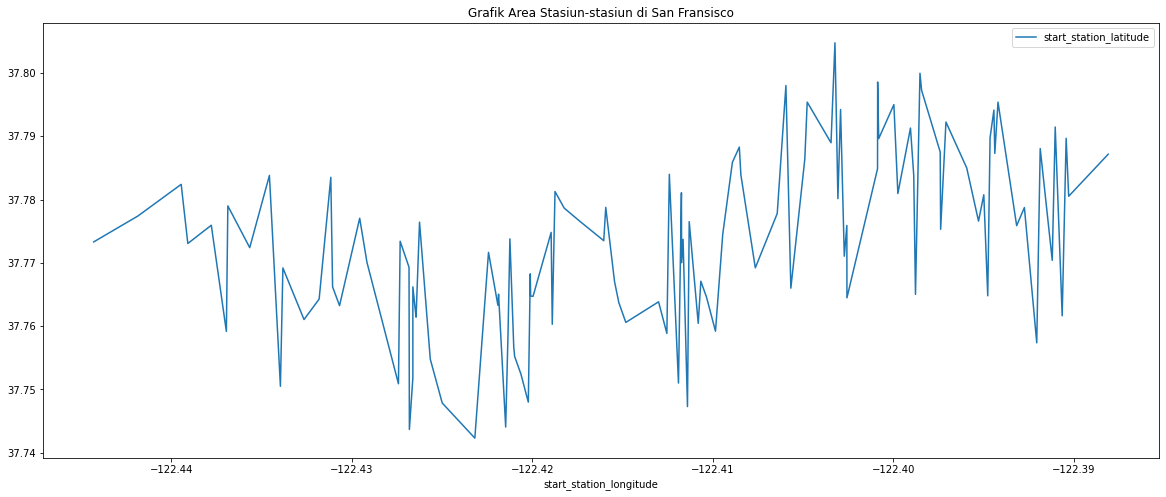

In [36]:
df_corr_stations.plot(x='start_station_longitude', y='start_station_latitude',figsize=(20,8),
                      title = 'Grafik Area Stasiun-stasiun di San Fransisco')

`Hasil visualisasi di atas merupakan hasil visualisasi berdasarkan kolom 'start_station_longitude' sebagai subu x dan start_station_latitude sebagai sumbu y`

### 3. Calculatin Station Area 

In [37]:
from scipy.integrate import trapz

`Untuk menyelesaikan kasus ini, saya menggunakan Library dari 'scipy.integrate' untuk melakukan perhitungan mencari luas area. Dan metode yang perhitngan yang ingin saya gunakan adalah trapezoidal. Untuk itu, saya juga mengimport package 'trapz' yang ada di dalam 'scipy.integrate'`

In [38]:
trapz(df_corr_stations.start_station_latitude, df_corr_stations.start_station_longitude)

2.1226564331363766

`Pada tahap ini saya melakukan perhitungan trapezoidal untuk menghitung luas area lingkup stasiun awal. Ternyata, luas area pada stasiun awal itu sebesar 2.1226564331363766 satuan square degree.`

# Summary 
```
1. Pada kasus ini jenis integral yang digunakan adalah Integral Definite. Hal ini dikarenakan problem kali ini adalah menghitung luas area lingkup stasiun awal yang mana nilai dari luas suatu bidang itu memiliki batas atas dan batas bawah. Dan hal ini sesuai dengan konsep Integral Definite yang mana dapat digunakan untuk mengukur suatu area yang memiliki batas.


2. Pada kasus ini metode yang digunakan dalam perhitungan adalah secara numerik. Hal ini dikarenakan data input yang diberikan pada soal berupa nilai/angka array yang ada di dalam dataset, bukan suau fungsi integral.
```